## 관람객 토큰화 & 워드 클라우드

In [1]:
import re
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 전처리 파일 불러오기

In [3]:
file = 'C:/coding/multicampus/프로젝트_주간_3조/theroundup_daum.csv'
encoding='cp949'
rev = pd.read_csv(file, encoding=encoding)
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1330 non-null   int64 
 1   review  1330 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.9+ KB


In [4]:
rev.head()

,rating,review
0,10,오늘 나의 해방일지 프리퀄인 범죄도시2를 보고왔습니다.\n구씨가 왜 도랑을 뛰어넘고...
1,1,15세 영화라니. 정말 기가 막힙니다. 이제 수위가 사라졌나요. 사람은 보고 들은 ...
2,10,"오늘 봤는데, 액션과 유머가 적절히 섞인 재미난 영화 한편이었어요^^ 새로운 감독에..."
3,3,아무리 흥행을 위해서라지만 너무 잔인합니다. 왜 우리 한국 영화가 이리도 잔인하게...
4,9,속편은 별로다는 선입견으로 별 기대 안하고 봤는데 전편만큼 재미있네요. 오락 영화로 만족


## 전처리 함수

In [22]:
#토큰화
def token_konlpy(text):
    okt=Okt()
    words=[]
    for word in okt.nouns(text):
        if not word == ('손' or '석' or '강') :
            if len(word)>1 :
                words.append(word)
        else:
            words.append(word)
    return words

#데이터 전처리
def review_preproces_ko(data, stop_words): 
    line_text = re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", " ", str(data)) # 한글 외 특수문자 제거
    words=token_konlpy(line_text)   # 토큰화 
    words = [w for w in words if not w in stop_words] #불용어 제거
    return words

#워드클라우드 실행
def wordcloud(data):
    cloud = WordCloud(font_path = 'NanumGothic.ttf', background_color="white",
                      width=800, height=600).generate_from_frequencies(data) 
    plt.figure(figsize=(15,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show() 

In [17]:
# 불용어처리
f = open('c:/coding/multicampus/datas/한글 불용어.txt', 'r', encoding='utf8')
stop_words = f.read().splitlines()
pop_word = ['영화', '진짜', '역시', '그냥', '최고', '보기', '정말', '역시', '보고', '포함', '이후'
            , '스포일러', '편도', '영화관', '정도', '편이', '장면', '느낌', '사람', '처음', '자체'
            , '이수', '내내', '계속', '간만', '때문', '하나', '조금', '완전', '무조건', '만큼']
[stop_words.append(stop) for stop in pop_word]
print(len(stop_words))

706


## 실행코드

In [23]:
results =[]
for line in rev['review']: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words)
    results.append(result)

#1차원 리스트로 축소
data = np.concatenate(results).tolist()

# 단어빈도수 추가
view_num = 100
count = Counter(data)
word = dict(count.most_common(view_num)) 

print(word)

{'마동석': 248, '손': 200, '액션': 192, '범죄': 144, '연기': 130, '도시': 117, '장첸': 107, '배우': 92, '구씨': 79, '재미': 77, '스토리': 59, '생각': 54, '기대': 53, '전편': 52, '관람': 50, '코믹': 44, '형사': 40, '악역': 37, '감독': 35, '오락': 34, '유머': 33, '웃음': 33, '평점': 32, '천만': 32, '오늘': 31, '한국': 31, '캐릭터': 31, '시리즈': 30, '대사': 29, '스트레스': 29, '코로나': 27, '빌런': 27, '극장': 26, '대박': 25, '윤계상': 24, '내용': 23, '개그': 22, '관객': 22, '격감': 22, '연출': 21, '잔인함': 21, '해상': 21, '작품': 20, '걱정': 20, '흥행': 20, '속편': 20, '범죄자': 20, '전작': 20, '조연': 20, '누가': 19, '수준': 19, '주먹': 19, '폭력': 18, '마블리': 18, '박지환': 18, '별로': 17, '중간': 17, '웃기': 17, '아주': 17, '해방일': 16, '영화로': 16, '한국영': 16, '한번': 16, '개봉': 16, '구가': 16, '매력': 16, '강추': 15, '구의': 15, '킬링타임': 15, '개인': 15, '경찰': 15, '마지막': 15, '몰입': 14, '현실': 14, '이건': 14, '석도': 14, '코드': 14, '히어로': 14, '부분': 14, '출연': 14, '편의': 13, '순삭': 13, '연기력': 13, '악당': 13, '소리': 13, '장르': 13, '이제': 12, '마음': 12, '요소': 12, '뭔가': 12, '시원': 12, '마블': 12, '추천': 12, '통쾌': 12, '다시': 12, '포인트': 11, '임팩트': 11, '

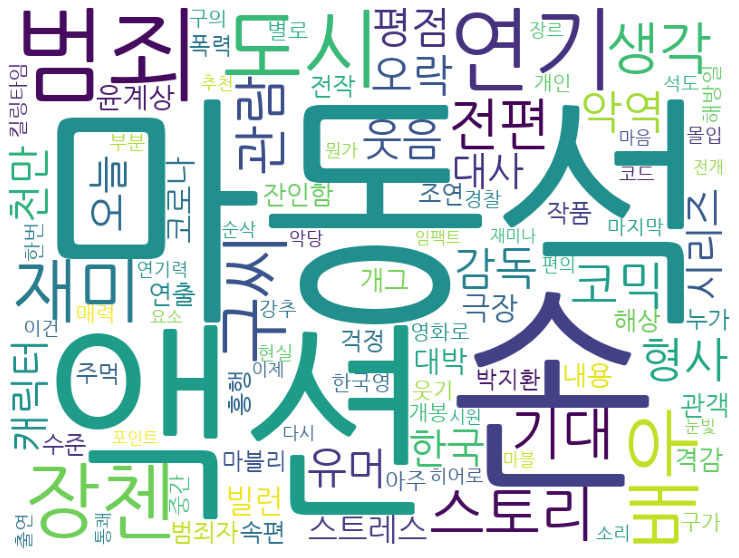

In [24]:
wordcloud(word)